# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [51]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [52]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


### Merge the DataFrames

In [53]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [54]:
#  1. Get the total rides for each city type
#use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
total_rides_per_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [55]:
# 2. Get the total drivers for each city type
#Use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.
total_drivers_per_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_per_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [56]:
#  3. Get the total amount of fares for each city type
#Use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.
total_fare_per_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_per_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [57]:
#  4. Get the average fare per ride for each city type. 
#calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
avg_fare_per_ride_by_type = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [58]:
# 5. Get the average fare per driver for each city type. 
#calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type
total_drivers = city_data_df["driver_count"].sum()
avg_fare_per_driver_by_type = sum_fares_by_type / total_drivers_per_type
avg_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [59]:
#  6. Create a PyBer summary DataFrame. 
#create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below

pyber_summary_df = pd.DataFrame({
     "Total Rides": total_rides_per_type,
     "Total Drivers": total_drivers_per_type,
     "Total Fares": total_fare_per_type,
     "Average Fare per Ride": avg_fare_per_ride_by_type,
     "Average Fare per Driver": avg_fare_per_driver_by_type})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [60]:
#  7. Cleaning up the DataFrame. Delete the index name
#use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [61]:
#  8. Format the columns.
# format the columns of the Pyber summary DataFrame to look like this

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [62]:
# 1. Read the merged DataFrame
#create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, 
#then apply the sum() method on the "fare" column to show the total fare amount for each date.

type_date_fare = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
type_date_fare.head(10)

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
      1/18/2019 0:46   15.12
      1/18/2019 7:36   43.57
      1/19/2019 11:40  49.44
      1/19/2019 12:38  38.68
      1/19/2019 20:21  56.78

In [63]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#use the provided code snippet to reset the index. This is needed to use the pivot() function in the next step (Step 3).
type_date_fare = type_date_fare.reset_index()
type_date_fare.head(10)

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [64]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#use the pivot() function to convert the DataFrame from the previous step so that...
#the index is the "date," each column is a city "type," and the values are the "fare."
#After this step, you’ll see that each cell has the total fare for the date and time, as shown in the following image.
# df = df.reset_index()
type_date_fare_pivot = type_date_fare.pivot(index="date", columns="type", values="fare")
type_date_fare_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [65]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-29.
#df.loc[:,'x2':'x4']

date_range = type_date_fare_pivot.loc[:,'2019-01-01':'2019-04-29']
date_range.head()

type
date
1/1/2019 0:08
1/1/2019 0:46
1/1/2019 12:32
1/1/2019 14:40
1/1/2019 14:42


In [66]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#use the provided code snippet to reset the index of the DataFrame from the previous step (Step 4) to a datetime data type. This is necessary to use the resample() method in Step 7.
type_date_fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 1/1/2019 0:08 to 5/8/2019 7:29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8+ KB


In [67]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#use the provided code snippet, df.info(), to check that the "date" is a datetime data type.
# df.index = pd.to_datetime(df.index)
type_date_fare_pivot.index = pd.to_datetime(type_date_fare_pivot.index)
type_date_fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [68]:
# 7. Check that the datatype for the index is datetime using df.info()
#create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5. 
#Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
type_date_fare_weekly = type_date_fare_pivot.resample("W").sum()
type_date_fare_weekly.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


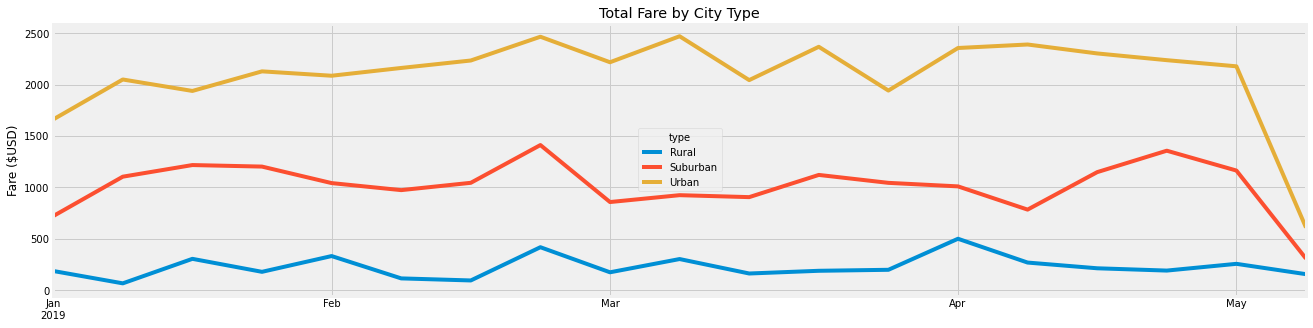

In [69]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot() method, 
#as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
#Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder.

type_date_fare_weekly.plot(figsize=(20,5))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.grid(True)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()